In [1]:
# Import External Packages
import scipy.stats as scs
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression

# Importing Custom Functions
import clusteringFns as clf
import reinforcementLearningFns as rlf
import plotFns as psyplt
import helperFns as mf

# Setting Seed for Reproducibility
np.random.seed(2021)

curPath = os.path.abspath(os.getcwd())

Starting Learning Simulation


/Users/jaredcollina/anaconda3/envs/behavior_analysis/lib/python3.11/site-packages/scipy/stats/_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
/Users/jaredcollina/anaconda3/envs/behavior_analysis/lib/python3.11/site-packages/scipy/stats/_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
/Users/jaredcollina/anaconda3/envs/behavior_analysis/lib/python3.11/site-packages/scipy/stats/_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))


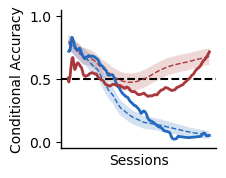

In [2]:
# Figure 4C (Takes a few minutes)

panel_choice = 'Right' # or 'Right'

if panel_choice == 'Left':
    ID = 'JC025'
    mfN = 3 # Model number of parameters
elif panel_choice == 'Right':
    ID = 'JC059'
    mfN = 4

reps = 50

sim = rlf.simulateFromFit(ID, mfN, reps)

sim_high = np.mean(sim['sim_high'], axis = 0)
std_high = np.std(sim['sim_high'], axis = 0)/np.sqrt(reps)

sim_low = np.mean(sim['sim_low'], axis = 0)
std_low = np.std(sim['sim_low'], axis = 0)/np.sqrt(reps)

###

smoothF = 5
nPoints = 400
smooth2 = 5

nPs, simTrace, simTraceSigned = clf.smoothLearningTraces(sim_low, sim_high, nPoints = nPoints, smoothF = smoothF, smooth2 = smooth2)[0:3]

nPs, simStd, x = clf.smoothLearningTraces(std_low, std_high, nPoints = nPoints, smoothF = smoothF, smooth2 = smooth2)[0:3]
simStd[0:nPoints] = 1 - simStd[0:nPoints]

nPs, rawTrace, rawTraceSigned = clf.smoothLearningTraces(sim['acc_low'], sim['acc_high'], nPoints = nPoints, smoothF = smoothF, smooth2 = smooth2)[0:3]

fig, ax = plt.subplots(1,1)

ax.plot(np.array(range(0,nPoints)), rawTrace[0:nPoints], linewidth = 2, color = psyplt.getColors('s_low'), alpha = 1, zorder = 5)
ax.plot(np.array(range(0,nPoints)), rawTrace[nPoints:(2*nPoints)], linewidth = 2, color = psyplt.getColors('s_high'), alpha = 1, zorder = 5)

ax.plot(np.array(range(0,nPoints)), simTrace[0:nPoints], linewidth = 1, linestyle = '--', color = psyplt.getColors('s_low'), alpha = 1, zorder = 3)
ax.fill_between(np.array(range(0,nPoints)), simTrace[0:nPoints] - simStd[0:nPoints], simTrace[0:nPoints] + simStd[0:nPoints], facecolor=psyplt.getColors('s_low'), zorder=1, alpha=0.2)

ax.plot(np.array(range(0,nPoints)), simTrace[nPoints:(2*nPoints)], linewidth = 1, linestyle = '--', color = psyplt.getColors('s_high'), alpha = 1, zorder = 3)
ax.fill_between(np.array(range(0,nPoints)), simTrace[nPoints:(2*nPoints)]-simStd[nPoints:(2*nPoints)], simTrace[nPoints:(2*nPoints)] + simStd[nPoints:(2*nPoints)], facecolor=psyplt.getColors('s_high'), zorder=1, alpha=0.2)

ax.set_ylim(-0.05,1.05)
ax.axhline(0.5, color = 'k', linestyle = '--')

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.xlabel('Sessions')
plt.ylabel('Conditional Accuracy')

image_format = 'svg' # e.g .png, .svg, etc.

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(1)

fig.set_size_inches(2,1.8)

plt.show()

0.03708716681933521


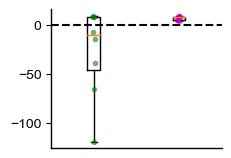

In [6]:
# Figure 4D

f3 = rlf.loadModelFit(3)
f3 = f3[['id','aic','bic']]
f3.rename(columns = {'aic':'aic_3','bic':'bic_3'}, inplace = True)

f_4 = rlf.loadModelFit(4)
f4 = f_4[['id','aic','bic']].copy()
f4.rename(columns = {'aic':'aic_4','bic':'bic_4'}, inplace = True)

f = pd.merge(f3,f4)

f['bic43'] = f['bic_4'] - f['bic_3']
f['aic43'] = f['aic_4'] - f['aic_3']

f.set_index('id', inplace = True)

# Now, excluding JC052 and JC061 because they weren't consistently classified compared to all of the other traces.

explIDs = ['GS037', 'GS040', 'JC028', 'JC029', 'JC039', 'JC047',  'JC059', 'JC062'] # 
noExplIDs = ['GS027', 'GS028', 'GS029', 'GS030',  'JC025', 'JC044', 'JC048', 'JC057', 'JC067'] #,'JC061', 'JC052', 


expl = f.loc[explIDs,'bic43']
nexpl = f.loc[noExplIDs,'bic43']

a,b = scs.ttest_ind(expl, nexpl)
print(b)

fig, ax = plt.subplots(1,1)

ax.boxplot((expl, nexpl))

x = np.random.normal(1, 0.01, size=len(expl))
ax.plot(x, expl, 'g.', alpha=0.5)

x = np.random.normal(2, 0.01, size=len(nexpl))
ax.plot(x, nexpl, 'm.', alpha=0.5)

ax.axhline(0, color = 'k', linestyle = '--')


font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)

ax.set(xlabel = None)
ax.set(ylabel = None)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False
    ) # labels along the bottom edge are off
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(1)

fig.set_size_inches(2.2,1.8)

plt.show()

In [9]:
# Calculating choice-history information for each mouse

IDs = ('GS027', 'GS028', 'GS029', 'GS030', 'GS037', 'GS040', 'JC025', 'JC028', 'JC029', 'JC039', 'JC044', 'JC047', 'JC048', 'JC052', 'JC057', 'JC059', 'JC061', 'JC062', 'JC067')
sessM = 300

ws = []
ls = []
hs = []

for axi, ID in enumerate(IDs):

    dataBase =  os.path.abspath(os.path.join(curPath,"data/Trajectories/with_bias_learning/"))
    file = mf.find_files('.pkl', ID + '_trainingDataBias', dataBase)[0]
    with open(file, 'rb') as f:
        loaded_dict = pickle.load(f)

    choice = loaded_dict['y']
    acc = loaded_dict['correct']
    cat = loaded_dict['answer']
    session = loaded_dict['session']

    ss = np.unique(session)

    # We want to get an index for all of the trials where the previous trial was an error
    prevAccIdx = (acc[session < sessM] == 1)
    prevAccIdx = prevAccIdx[:-1]

    # Now, we want to create a vector that tells us whether the mouse repeats the previous choice

    reps = (np.diff(choice[session < sessM]) == 0)
    cat_reps = (np.diff(cat[session < sessM]) == 0)
    # Now, we want to calculate the probability that the mouse switches given that there was an error

    #axs[axi,0].scatter(si, np.mean(reps[prevAccIdx == 1]) - np.mean(cat_reps[prevAccIdx == 1]),8,'b')
    ws.append(np.mean(reps[prevAccIdx == 1]))

    # We want to get an index for all of the trials where the previous trial was an error
    prevErrIdx = (acc[session < sessM] == 0)
    prevErrIdx = prevErrIdx[:-1]

    # Now, we want to create a vector that tells us whether the mouse alternates from the previous choice

    alts = (np.diff(choice[session < sessM]) != 0)
    cat_alts = (np.diff(cat[session < sessM]) != 0)

    # Now, we want to calculate the probability that the mouse switches given that there was an error

    ls.append(np.mean(alts[prevErrIdx == 1]))

    win_stay = np.logical_and(prevAccIdx, reps)
    lose_switch = np.logical_and(prevErrIdx, alts)

    history = np.logical_or(win_stay, lose_switch)
    hs.append(np.mean(history))

    # We also want to "normalize" this by the number of times that this behavior would have given the correct response...

    win_stay_cat = np.logical_and(prevAccIdx, cat_reps)
    lose_switch_cat = np.logical_and(prevErrIdx, cat_alts)
    cat_history = np.logical_or(win_stay_cat, lose_switch_cat)


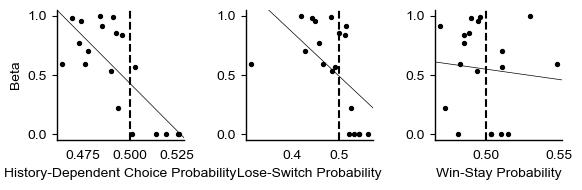

In [12]:
# Figure 4E-G

explf4 = rlf.loadModelFit(4)
fig, axs = plt.subplots(1,3, figsize = (6, 2))

b = np.exp(-1*explf4['beta'])

axs[0].scatter(hs, b, 8, color = 'k')

x = np.array(hs).reshape(-1, 1)
y = np.array(b).reshape(-1, 1)

reg = LinearRegression().fit(x, y)
xl = (np.min(x), np.max(x))
yl = reg.intercept_[0] + reg.coef_[0] * xl

temp = pd.DataFrame(np.hstack((x,y)))
p, r = mf.calculate_pvalues_spearman(temp) 
p = p[0][1]
r = r[0][1]

axs[0].axline((np.mean(x),reg.intercept_[0] + reg.coef_[0][0]*np.mean(x)), slope = reg.coef_[0][0], linewidth = 0.5, color='k', label = 'p = ' + str(p) + ', ' + r'$\rho$' + ' = ' + str(np.round(r,2)))

axs[0].axvline(0.5, linestyle = "--", color = 'k')
axs[0].set_xlabel("History-Dependent Choice Probability")
axs[0].set_ylabel("Beta")

axs[2].scatter(ws, b, 8, color = 'k')

x = np.array(ws).reshape(-1, 1)
y = np.array(b).reshape(-1, 1)

reg = LinearRegression().fit(x, y)
xl = (np.min(x), np.max(x))
yl = reg.intercept_[0] + reg.coef_[0] * xl

temp = pd.DataFrame(np.hstack((x,y)))
p, r = mf.calculate_pvalues_spearman(temp) 
p = p[0][1]
r = r[0][1]

axs[2].axline((np.mean(x),reg.intercept_[0] + reg.coef_[0][0]*np.mean(x)), slope = reg.coef_[0][0], linewidth = 0.5, color='k', label = 'p = ' + str(p) + ', ' + r'$\rho$' + ' = ' + str(np.round(r,2)))

axs[2].axvline(0.5, linestyle = "--", color = 'k')
axs[2].set_xlabel("Win-Stay Probability")

axs[1].scatter(ls, b, 8, color = 'k')

x = np.array(ls).reshape(-1, 1)
y = np.array(b).reshape(-1, 1)

reg = LinearRegression().fit(x, y)
xl = (np.min(x), np.max(x))
yl = reg.intercept_[0] + reg.coef_[0] * xl

temp = pd.DataFrame(np.hstack((x,y)))
p, r = mf.calculate_pvalues_spearman(temp) 
p = p[0][1]
r = r[0][1]

axs[1].axline((np.mean(x),reg.intercept_[0] + reg.coef_[0][0]*np.mean(x)), slope = reg.coef_[0][0], linewidth = 0.5, color = 'k', label = 'p = ' + str(p) + ', ' + r'$\rho$' + ' = ' + str(np.round(r,2)))

axs[1].axvline(0.5, linestyle = "--", color = 'k')
axs[1].set_xlabel("Lose-Switch Probability")

for ax in axs:

    ax.spines[['right', 'top']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(1)
    ax.set_ylim(-0.05,1.05)
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False)#,         # ticks along the top edge are off


plt.tight_layout()
plt.show()

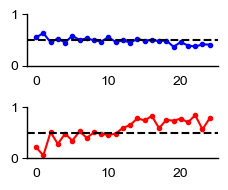

In [13]:
# Figure 4H

ID = 'JC052'

fig, axs = plt.subplots(2, 1, figsize = (2.5, 2))

dataBase =  os.path.abspath(os.path.join(curPath,"data/Trajectories/with_bias_learning/"))
file = mf.find_files('.pkl', ID + '_trainingDataBias', dataBase)[0]
with open(file, 'rb') as f:
    loaded_dict = pickle.load(f)

choice = loaded_dict['y']
acc = loaded_dict['correct']
cat = loaded_dict['answer']
session = loaded_dict['session']

ss = np.unique(session)

ws = []
ls = []
hs = []

for si in ss:

    # We want to get an index for all of the trials where the previous trial was an error
    prevAccIdx = (acc[session == si] == 1)
    prevAccIdx = prevAccIdx[:-1]

    # Now, we want to create a vector that tells us whether the mouse repeats the previous choice

    reps = (np.diff(choice[session == si]) == 0)
    cat_reps = (np.diff(cat[session == si]) == 0)
    # Now, we want to calculate the probability that the mouse switches given that there was an error


    ws.append(np.mean(reps[prevAccIdx == 1]))

    # We want to get an index for all of the trials where the previous trial was an error
    prevErrIdx = (acc[session == si] == 0)
    prevErrIdx = prevErrIdx[:-1]

    # Now, we want to create a vector that tells us whether the mouse alternates from the previous choice

    alts = (np.diff(choice[session == si]) != 0)
    cat_alts = (np.diff(cat[session == si]) != 0)

    # Now, we want to calculate the probability that the mouse switches given that there was an error

    ls.append(np.mean(alts[prevErrIdx]))

    win_stay = np.logical_and(prevAccIdx, reps)
    lose_switch = np.logical_and(prevErrIdx, alts)

    history = np.logical_or(win_stay, lose_switch)

    # We also want to "normalize" this by the number of times that this behavior would have given the correct response...

    win_stay_cat = np.logical_and(prevAccIdx, cat_reps)
    lose_switch_cat = np.logical_and(prevErrIdx, cat_alts)
    cat_history = np.logical_or(win_stay_cat, lose_switch_cat)

    hs.append(np.mean(history))

axs[0].plot(ws, 'b.-')
axs[0].axhline(0.5, color = 'k', linestyle = '--')
axs[0].set_ylim(0,1)

axs[1].plot(ls, 'r.-')  
axs[1].axhline(0.5, color = 'k', linestyle = '--')
axs[1].set_ylim(0,1)

for axx in axs:
    axx.spines[['right', 'top']].set_visible(False)
    axx.spines[['left', 'bottom']].set_linewidth(1)
    axx.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False)#,         # ticks along the top edge are off

plt.tight_layout()
plt.show()


In [14]:
# Analysis For Figure 4I-J

sNum = 3

IDs = ('GS027', 'GS028', 'GS029', 'GS030', 'GS037', 'GS040', 'JC025', 'JC028', 'JC029', 'JC039', 'JC044', 'JC047', 'JC048', 'JC052', 'JC057', 'JC059', 'JC061', 'JC062', 'JC067')

ws_early = []
ws_late = []

ls_early = []
ls_late = []

for axi, ID in enumerate(IDs):

    dataBase =  os.path.abspath(os.path.join(curPath,"data/Trajectories/with_bias_learning/"))
    file = mf.find_files('.pkl', ID + '_trainingDataBias', dataBase)[0]
    with open(file, 'rb') as f:
        loaded_dict = pickle.load(f)

    choice = loaded_dict['y']
    acc = loaded_dict['correct']
    cat = loaded_dict['answer']
    session = loaded_dict['session']

    ss = np.unique(session)
    sm = np.max(session)

    # We want to get an index for all of the trials where the previous trial was an error
    prevAccIdx = (acc[session < (sNum + 1)] == 1)
    prevAccIdx = prevAccIdx[:-1]

    reps = (np.diff(choice[session < (sNum + 1)]) == 0)
    cat_reps = (np.diff(cat[session < (sNum + 1)]) == 0)

    ws_early.append(np.mean(reps[prevAccIdx == 1]))

    # We want to get an index for all of the trials where the previous trial was an error
    prevErrIdx = (acc[session < (sNum + 1)] == 0)
    prevErrIdx = prevErrIdx[:-1]

    alts = (np.diff(choice[session < (sNum + 1)]) != 0)
    cat_alts = (np.diff(cat[session < (sNum + 1)]) != 0)

    ls_early.append(np.mean(alts[prevErrIdx]))
    
    # We want to get an index for all of the trials where the previous trial was an error
    prevAccIdx = (acc[session > (sm - sNum)] == 1)
    prevAccIdx = prevAccIdx[:-1]

    reps = (np.diff(choice[session > (sm - sNum)]) == 0)
    cat_reps = (np.diff(cat[session > (sm - sNum)]) == 0)

    ws_late.append(np.mean(reps[prevAccIdx == 1]))

    # We want to get an index for all of the trials where the previous trial was an error
    prevErrIdx = (acc[session > (sm - sNum)] == 0)
    prevErrIdx = prevErrIdx[:-1]

    alts = (np.diff(choice[session > (sm - sNum)]) != 0)
    cat_alts = (np.diff(cat[session > (sm - sNum)]) != 0)

    ls_late.append(np.mean(alts[prevErrIdx]))


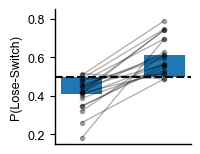

WilcoxonResult(statistic=1.0, pvalue=7.62939453125e-06)

In [ ]:
# Figure 4I

fig, ax = plt.subplots(1,1, figsize = (1.75,1.75))
for i, ls in enumerate(ls_early):
    ax.plot((1,2),(ls_early[i], ls_late[i]),'k.-', linewidth = 1, alpha = 0.3)

ax.bar((1,2),(np.mean(ls_early) - 0.5, np.mean(ls_late) - 0.5), width = 0.5, bottom = 0.5)
ax.axhline(0.5,color = 'k', linestyle = '--')

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(1)

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,#,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('P(Lose-Switch)')

plt.ylim(0.15, 0.85)
plt.show()

scs.wilcoxon(ls_early, ls_late, alternative = "two-sided")

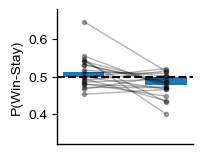

WilcoxonResult(statistic=35.0, pvalue=0.014068603515625)

In [15]:
# Figure 4J

fig, ax = plt.subplots(1,1, figsize = (1.75,1.75))
for i, ls in enumerate(ws_early):
    ax.plot((1,2),(ws_early[i], ws_late[i]),'k.-', linewidth = 1, alpha = 0.3)

ax.bar((1,2),(np.mean(ws_early) - 0.5, np.mean(ws_late) - 0.5), width = 0.5, bottom = 0.5)
ax.axhline(0.5,color = 'k', linestyle = '--')

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(1)

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,#,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('P(Win-Stay)')

plt.ylim(0.32, 0.68)
plt.show()

scs.wilcoxon(ws_early, ws_late, alternative = "two-sided")